In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx
import itertools

In [15]:
def bootstrap(data, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [20]:
names_control = ["right-center", "center", "left", "left-center", "right"]
names = ["Alt-right", "IDW", "Alt-lite", "control"]
names_list_list = [["Alt-right"], ["IDW"], ["Alt-lite"], names_control]
lines = ['-', '--', '-.', ':', '-', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

# TextBlob

In [19]:
blob_df_path = df_path + "text_blob_df/time/"
pol = []
subj = []
for name in names:
    pol.append(pd.read_csv(f"{blob_df_path}{name}_pol.csv"))
    subj.append(pd.read_csv(f"{blob_df_path}{name}_subj.csv"))

### Mean

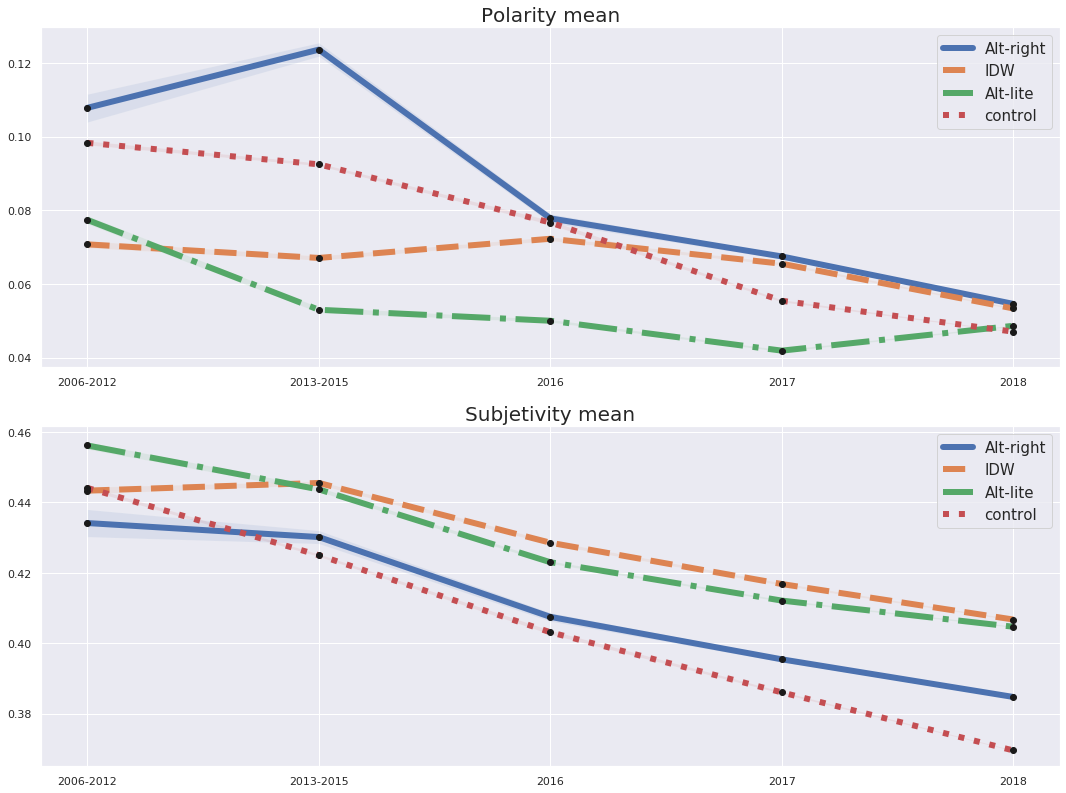

In [23]:
fig, ax = plt.subplots(2, 1, figsize=[15, 7],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
space = ' '
#plt.suptitle(f"Polarity {70*space} Subjetivity", fontsize=20, y=1.05)
ax[0, 0].set_title("Polarity mean", fontsize=20)
#ax[0, 0].set_ylim([0.,0.25])
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x, pol[i].y, lines[i], linewidth=6)
ax[0, 0].legend(names, prop={'size': 15})
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x, pol[i].y, 'ok')
    ax[0, 0].fill_between(pol[i].x, pol[i]["dyd"], pol[i]["dyu"], alpha=0.1)

ax[1, 0].set_title("Subjetivity mean", fontsize=20)
#ax[1, 0].set_ylim([0.36,0.48])
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x, subj[i].y, lines[i], linewidth=6)
ax[1, 0].legend(names, prop={'size': 15})
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x, subj[i].y, 'ok')
    ax[1, 0].fill_between(subj[i].x, subj[i]["dyd"], subj[i]["dyu"], alpha=0.1)
plt.savefig(f"{img_path}textblob/time/blob_mean.png", bbox_inches = 'tight')

### Standard Deviation

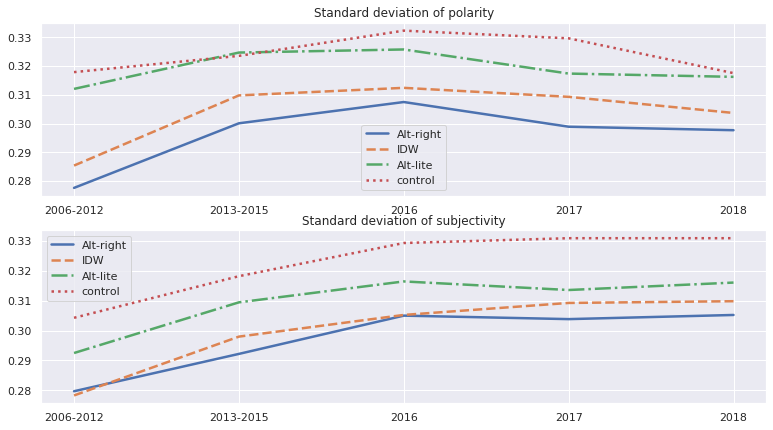

In [24]:
fig = plt.figure(figsize=[13, 7])
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for i in range(len(pol)):
    ax1.plot(pol[i].x, pol[i]["std"], lines[i], linewidth=2.5)
ax1.set_title("Standard deviation of polarity")
ax1.legend(names);
for i in range(len(subj)):
    ax2.plot(subj[i].x, subj[i]["std"], lines[i], linewidth=2.5)
ax2.set_title("Standard deviation of subjectivity")
ax2.legend(names);
plt.savefig(f"{img_path}textblob/time/blob_standard_deviation.png")

### Polarity mean with standard deviation

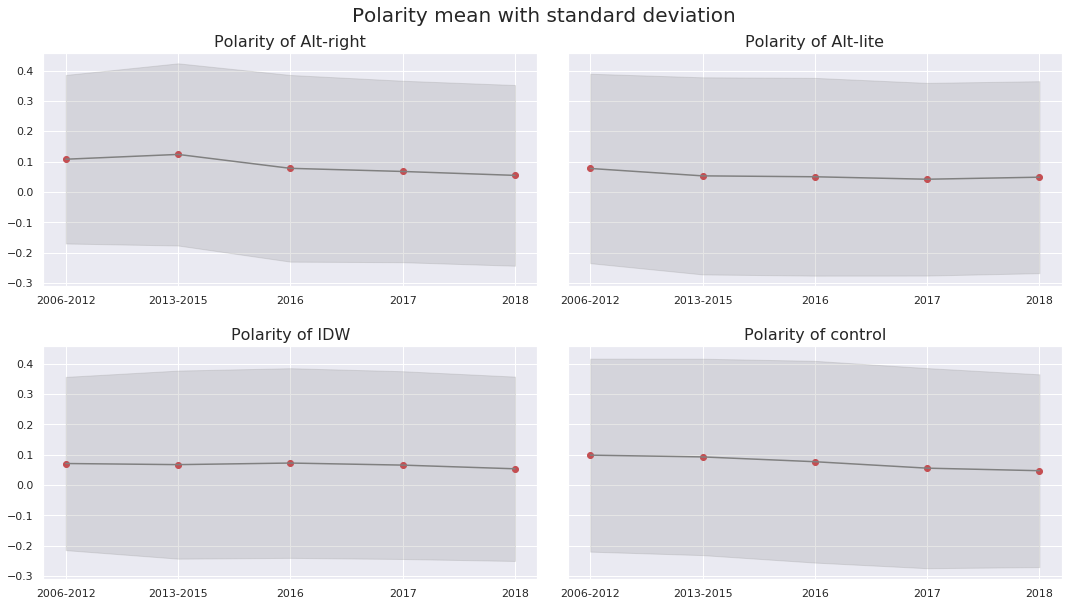

In [25]:
fig, ax = plt.subplots(2, 2, figsize=[15, 8],  squeeze=False, sharey=True)
plt.tight_layout(h_pad=3)
space = ' '
plt.suptitle(f"Polarity mean with standard deviation", fontsize=20, y=1.05)
for i in range(len(pol)):
    ax[i%2, i//2].set_title(f"Polarity of {names[i]}", fontsize=16)
    ax[i%2, i//2].plot(pol[i].x, pol[i].y, 'or')
    ax[i%2, i//2].plot(pol[i].x, pol[i].y, '-', color='gray')

    ax[i%2, i//2].fill_between(pol[i].x, pol[i].y-pol[i]["std"], pol[i].y+pol[i]["std"],
                     color='gray', alpha=0.2)
plt.savefig(f"{img_path}textblob/time/polarity_mean_and_std.png", bbox_inches = 'tight')

### Subjectivity mean with standard deviation

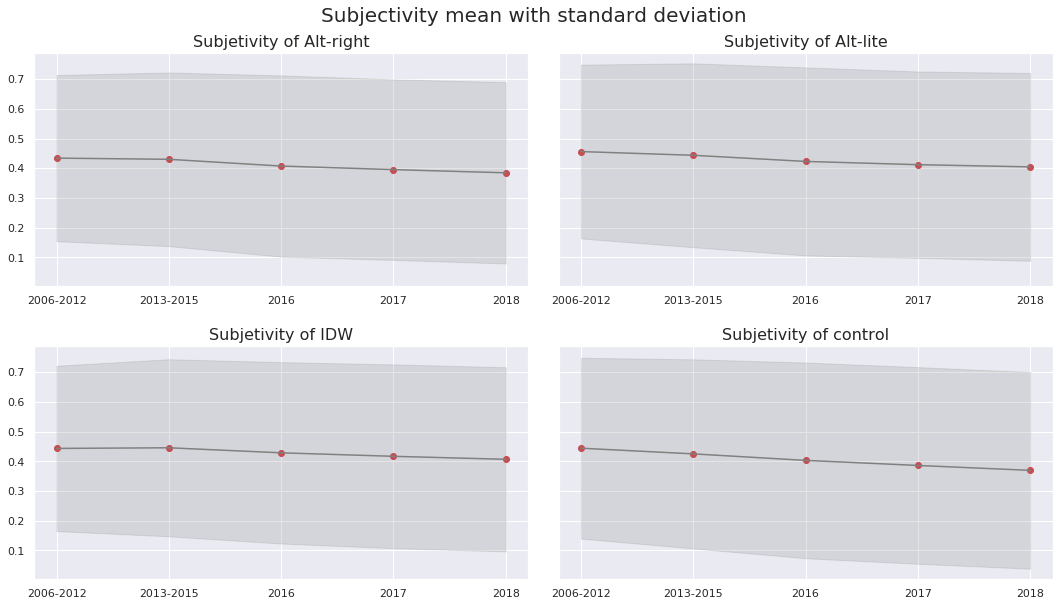

In [26]:
fig, ax = plt.subplots(2, 2, figsize=[15, 8],  squeeze=False, sharey=True)
plt.tight_layout(h_pad=3)
space = ' '
plt.suptitle(f"Subjectivity mean with standard deviation", fontsize=20, y=1.05)
for i in range(len(subj)):
    ax[i%2, i//2].set_title(f"Subjetivity of {names[i]}", fontsize=16)
    ax[i%2, i//2].plot(subj[i].x, subj[i].y, 'or')
    ax[i%2, i//2].plot(subj[i].x, subj[i].y, '-', color='gray')

    ax[i%2, i//2].fill_between(subj[i].x, subj[i].y-subj[i]["std"], subj[i].y+subj[i]["std"],
                     color='gray', alpha=0.2)
plt.savefig(f"{img_path}textblob/time/subjectivity_mean_and_std.png", bbox_inches = 'tight')

### Proportion

In [15]:
pol = []
subj = []
blob_prop_df_path = df_path + "text_blob_proportion_df/time/"
for name in names:
    pol.append(pd.read_csv(f"{blob_prop_df_path}{name}_pol_prop.csv"))
    subj.append(pd.read_csv(f"{blob_prop_df_path}{name}_subj_prop.csv"))
x=[i for i in range(2007, 2020)]

### Polarity Proportion

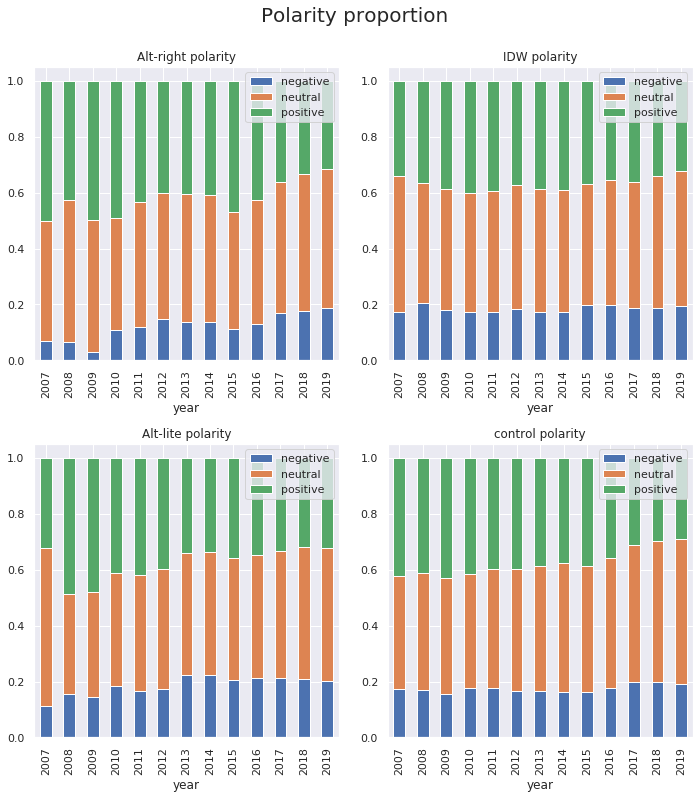

In [21]:
fig, ax = plt.subplots(2, 2, figsize=[10, 10],  squeeze=False)
plt.tight_layout(h_pad=5.0)
plt.suptitle("Polarity proportion", fontsize=20, y=1.06)
for i in range(len(pol)):
    ax[i//2, i%2].set_title((f"{names[i]} polarity"))
    df=pd.DataFrame({"year":x, 'negative':pol[i]["neg"], 'neutral':pol[i]["neu"], 'positive':pol[i]["pos"]})
    df.plot(x="year", kind='bar', stacked=True, ax=ax[i//2, i%2])
#plt.savefig("{imgs_path}textblob/polarity_proportion_bar.png", bbox_inches = 'tight')

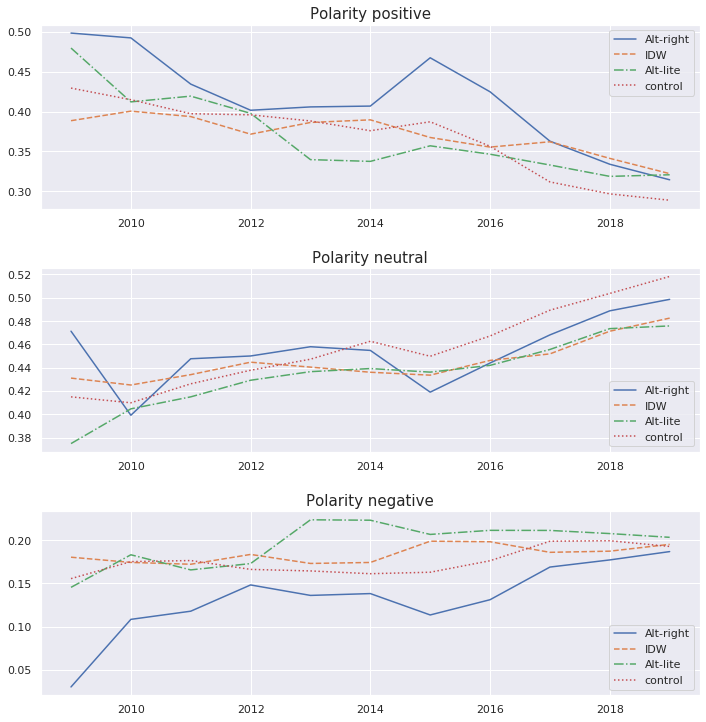

In [22]:
fig, ax = plt.subplots(3, 1, figsize=[10, 10],  squeeze=False)
plt.tight_layout(h_pad=3.0)

ax[0, 0].set_title("Polarity positive", fontsize=15)
for i in range(len(pol)):
    ax[0, 0].plot(pol[i]["x"][2:], pol[i]["pos"][2:], lines[i])
ax[0, 0].legend(names);

ax[1, 0].set_title("Polarity neutral", fontsize=15)
for i in range(len(pol)):
    ax[1, 0].plot(pol[i]["x"][2:], pol[i]["neu"][2:], lines[i])
ax[1, 0].legend(names)

ax[2, 0].set_title("Polarity negative", fontsize=15)
for i in range(len(pol)):
    ax[2, 0].plot(pol[i]["x"][2:], pol[i]["neg"][2:], lines[i])
ax[2, 0].legend(names);
#plt.savefig("{imgs_path}textblob/polarity_proportion_lines.png", bbox_inches = 'tight')

### Subjectivity Proportion

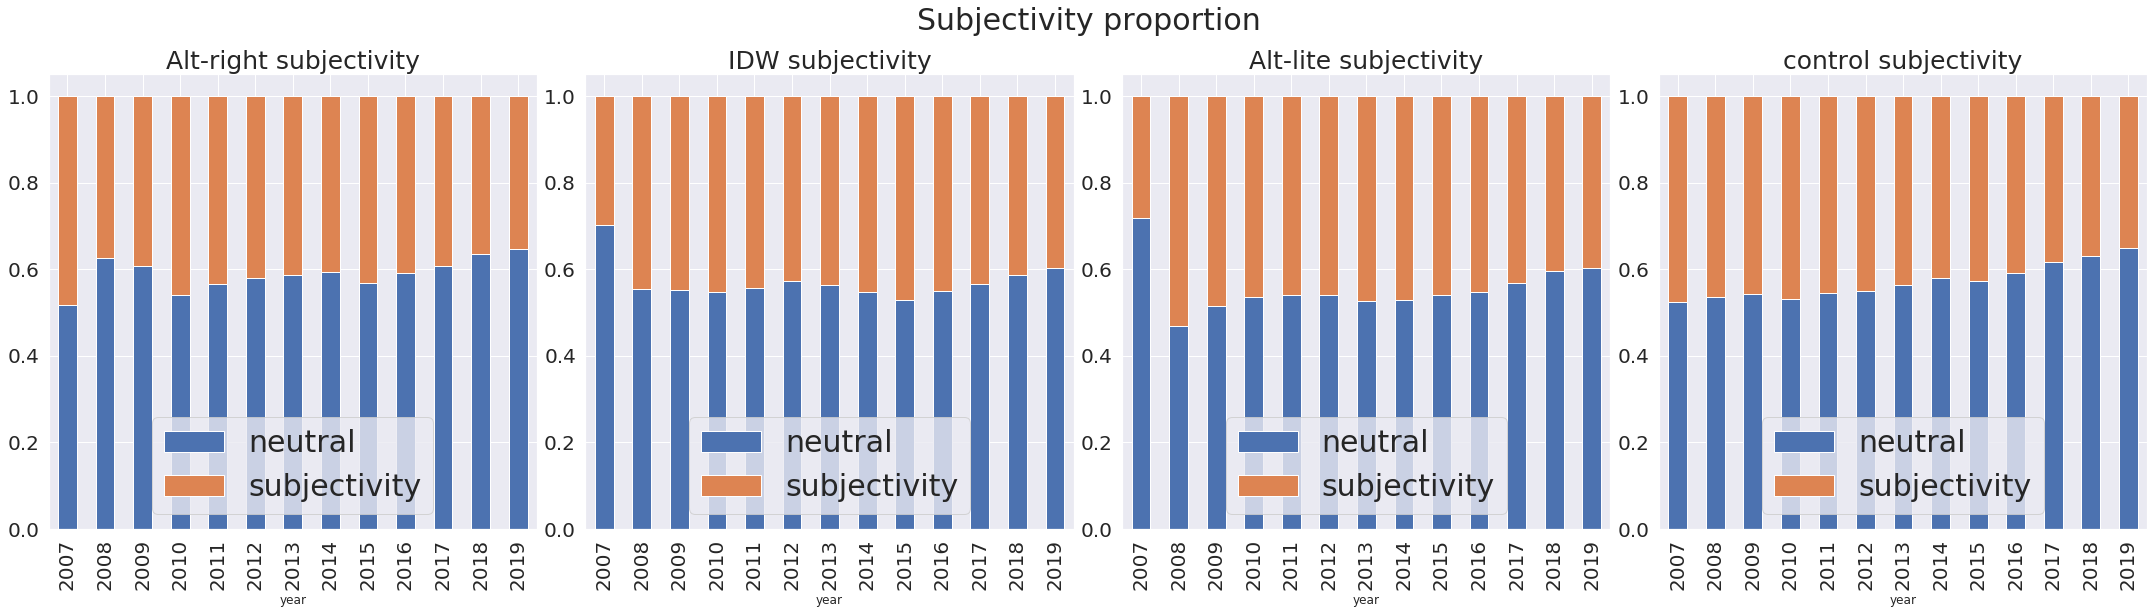

In [24]:
fig, ax = plt.subplots(1, 4, figsize=[30, 7],  squeeze=False)
plt.tight_layout(h_pad=5.0)
plt.suptitle("Subjectivity proportion", fontsize=30, y=1.1)
for i in range(len(subj)):
    ax[i//4, i%4].set_title((f"{names[i]} subjectivity"), size=25)
    ax[i//4, i%4].tick_params(axis='both', labelsize=20)

    df=pd.DataFrame({"year":x, 'neutral':subj[i]["neu"], 'subjectivity':subj[i]["pos"]})
    df.plot(x="year", kind='bar', stacked=True, ax=ax[i//4, i%4])
    ax[i//4, i%4].legend(prop={'size': 30})
#plt.savefig("{imgs_path}textblob/subjectivity_proportion_bars.png", bbox_inches = 'tight')

# Empath

In [28]:
emotion_list = ['size', 'sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']
empath = []
empath_df_path = df_path + "empath_df/time/"
for name in names:
    empath.append(pd.read_csv(f"{empath_df_path}{name}_empath.csv"))

### Mean

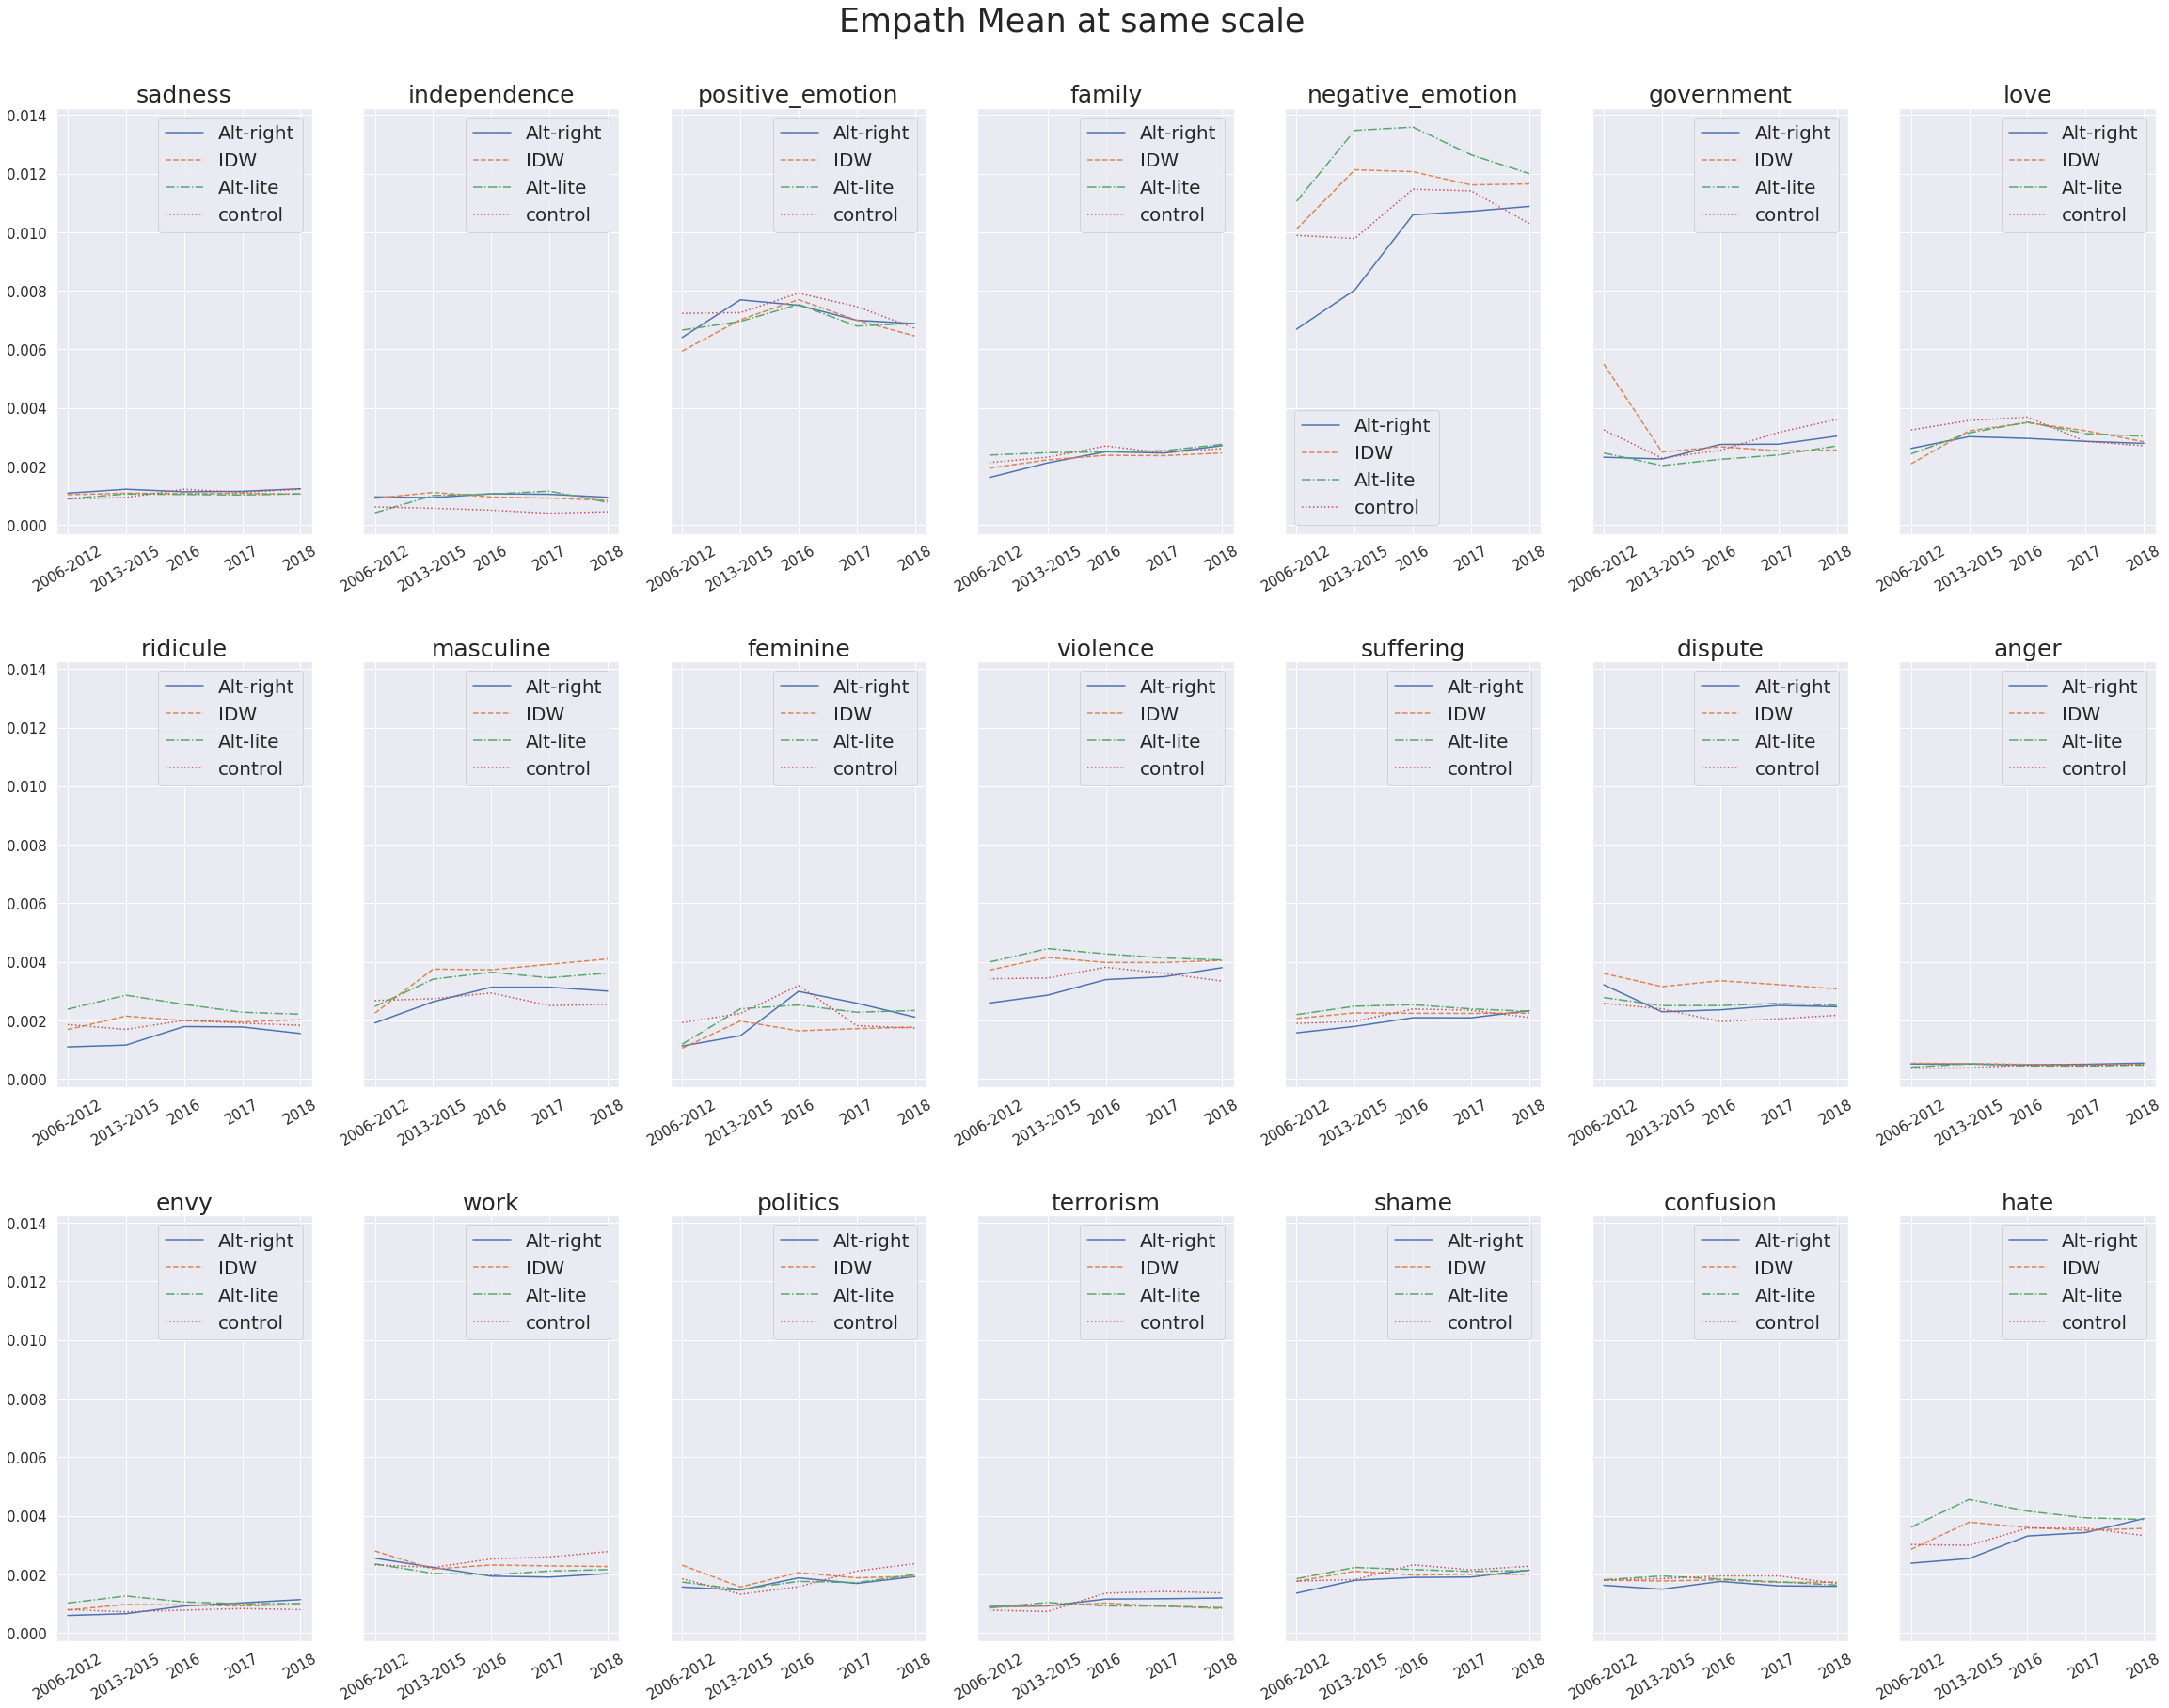

In [47]:
fig, ax = plt.subplots(3, 7, figsize=[40, 30],  squeeze=False, sharey=True)
c=0
plt.suptitle("Empath Mean at same scale", fontsize=35, y=.93)
plt.subplots_adjust(hspace=0.3)
for emotion in emotion_list[1:]:
    ax[c//7, c%7].set_title(emotion, fontsize=25)
    for i in range(len(names)):
        ax[c//7, c%7].plot(empath[i]["year"], empath[i][emotion], lines[i])
        
    ax[c//7, c%7].legend(names, fontsize=20)
    ax[c//7, c%7].tick_params(axis='both', labelsize=15)
    ax[c//7, c%7].tick_params(axis='x', rotation=30)
    c+=1
plt.savefig(f"{img_path}empath/time/empath_sharey.png", bbox_inches = 'tight')

# Polarity with Empath

In [48]:
y = []
emp_pol_df_path = df_path + "empath_blob_df/time/"
for name in names:
    y.append(pd.read_csv(f"{emp_pol_df_path}{name}_pol_empath_prop_boots.csv"))

### Mean

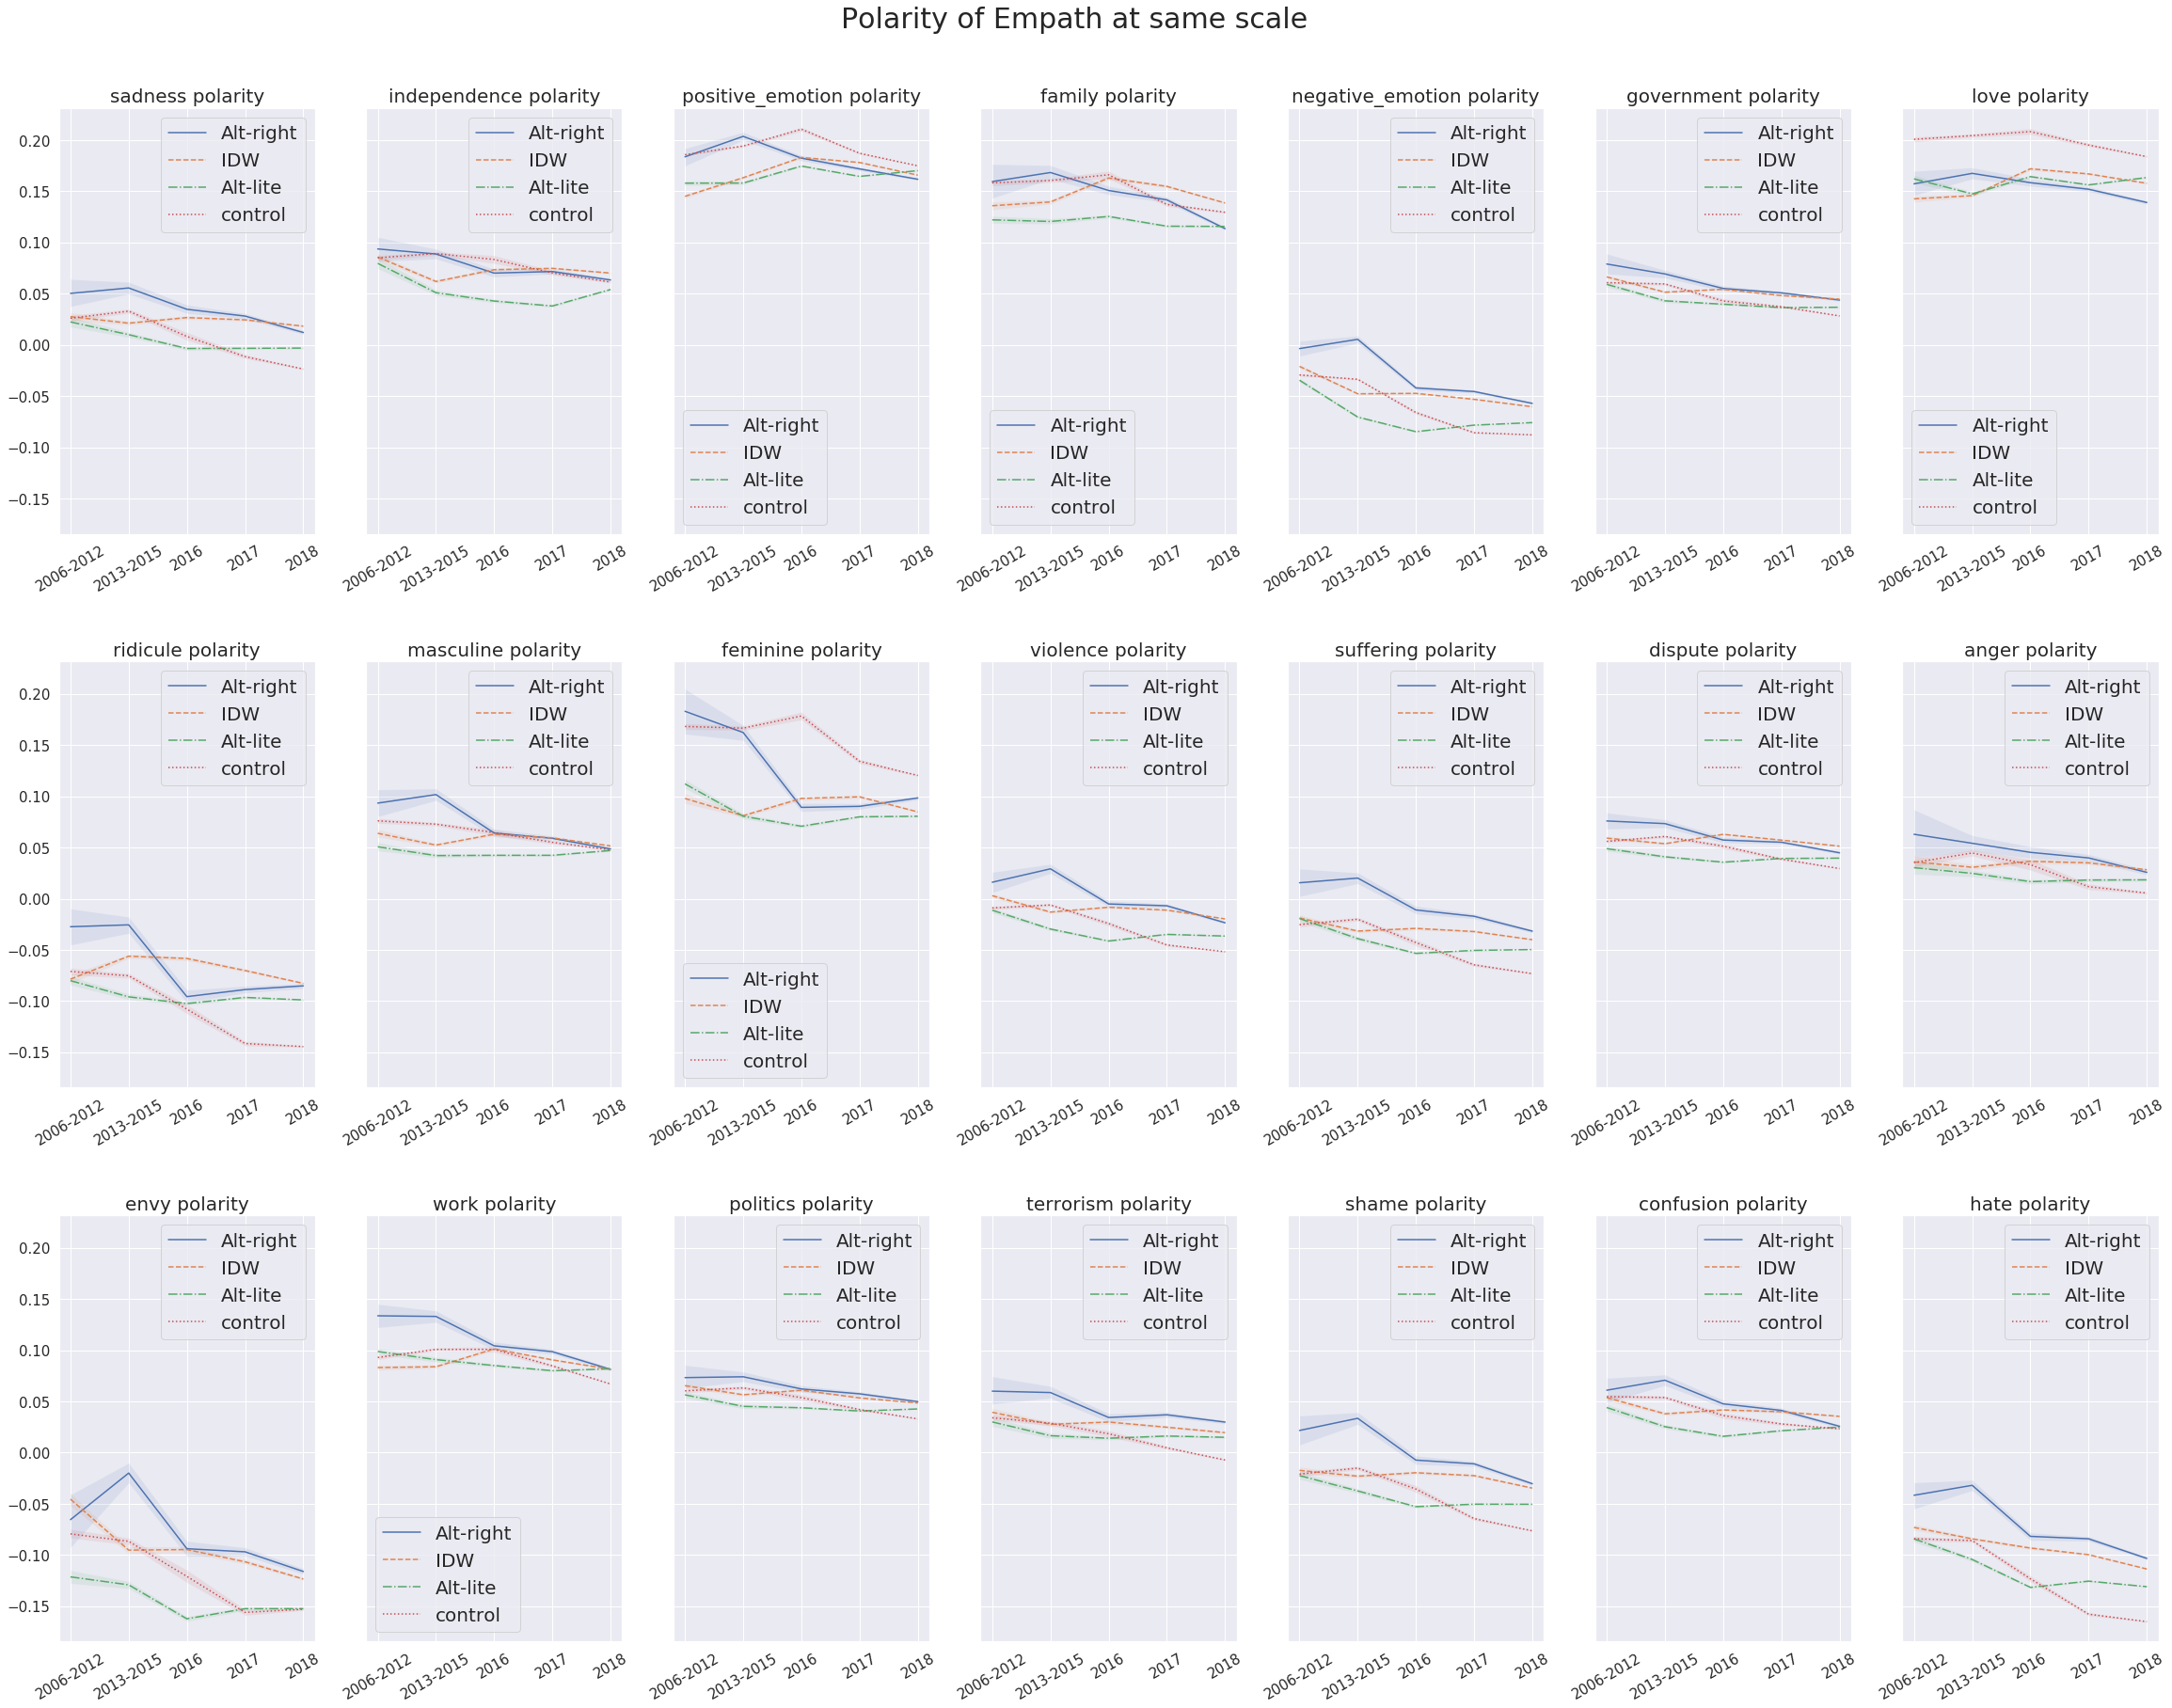

In [55]:
fig, ax = plt.subplots(3, 7, figsize=[40, 30],  squeeze=False, sharey=True)
c=0
plt.suptitle("Polarity of Empath at same scale", fontsize=30, y=.93)
plt.subplots_adjust(hspace=0.3)

for emotion in emotion_list[1:]:
    ax[c//7, c%7].set_title(f'{emotion} polarity', fontsize=20)
    for i in range(len(names)):
        ax[c//7, c%7].plot(y[i]["year"], y[i][emotion], lines[i])
        ax[c//7, c%7].fill_between(y[i]["year"], y[i][f"{emotion}_dyd"],
                                   y[i][f"{emotion}_dyu"], alpha=0.1)    
    ax[c//7, c%7].legend(names, fontsize=20)
    ax[c//7, c%7].tick_params(axis='both', labelsize=15)
    ax[c//7, c%7].tick_params(axis='x', rotation=30)

    c+=1
    
plt.savefig(f"{img_path}empath_blob/time/polarity_empath_sharey.png")

# Perspective

In [56]:
attributes = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK', 'INSULT',
             'PROFANITY', 'THREAT', 'SEXUALLY_EXPLICIT',  'FLIRTATION']
persp_df_path = df_path + "perspective_df/time/"
perspective = []
for name in names:
    perspective.append(pd.read_csv(f"{persp_df_path}{name}_perspective.csv"))

### Mean

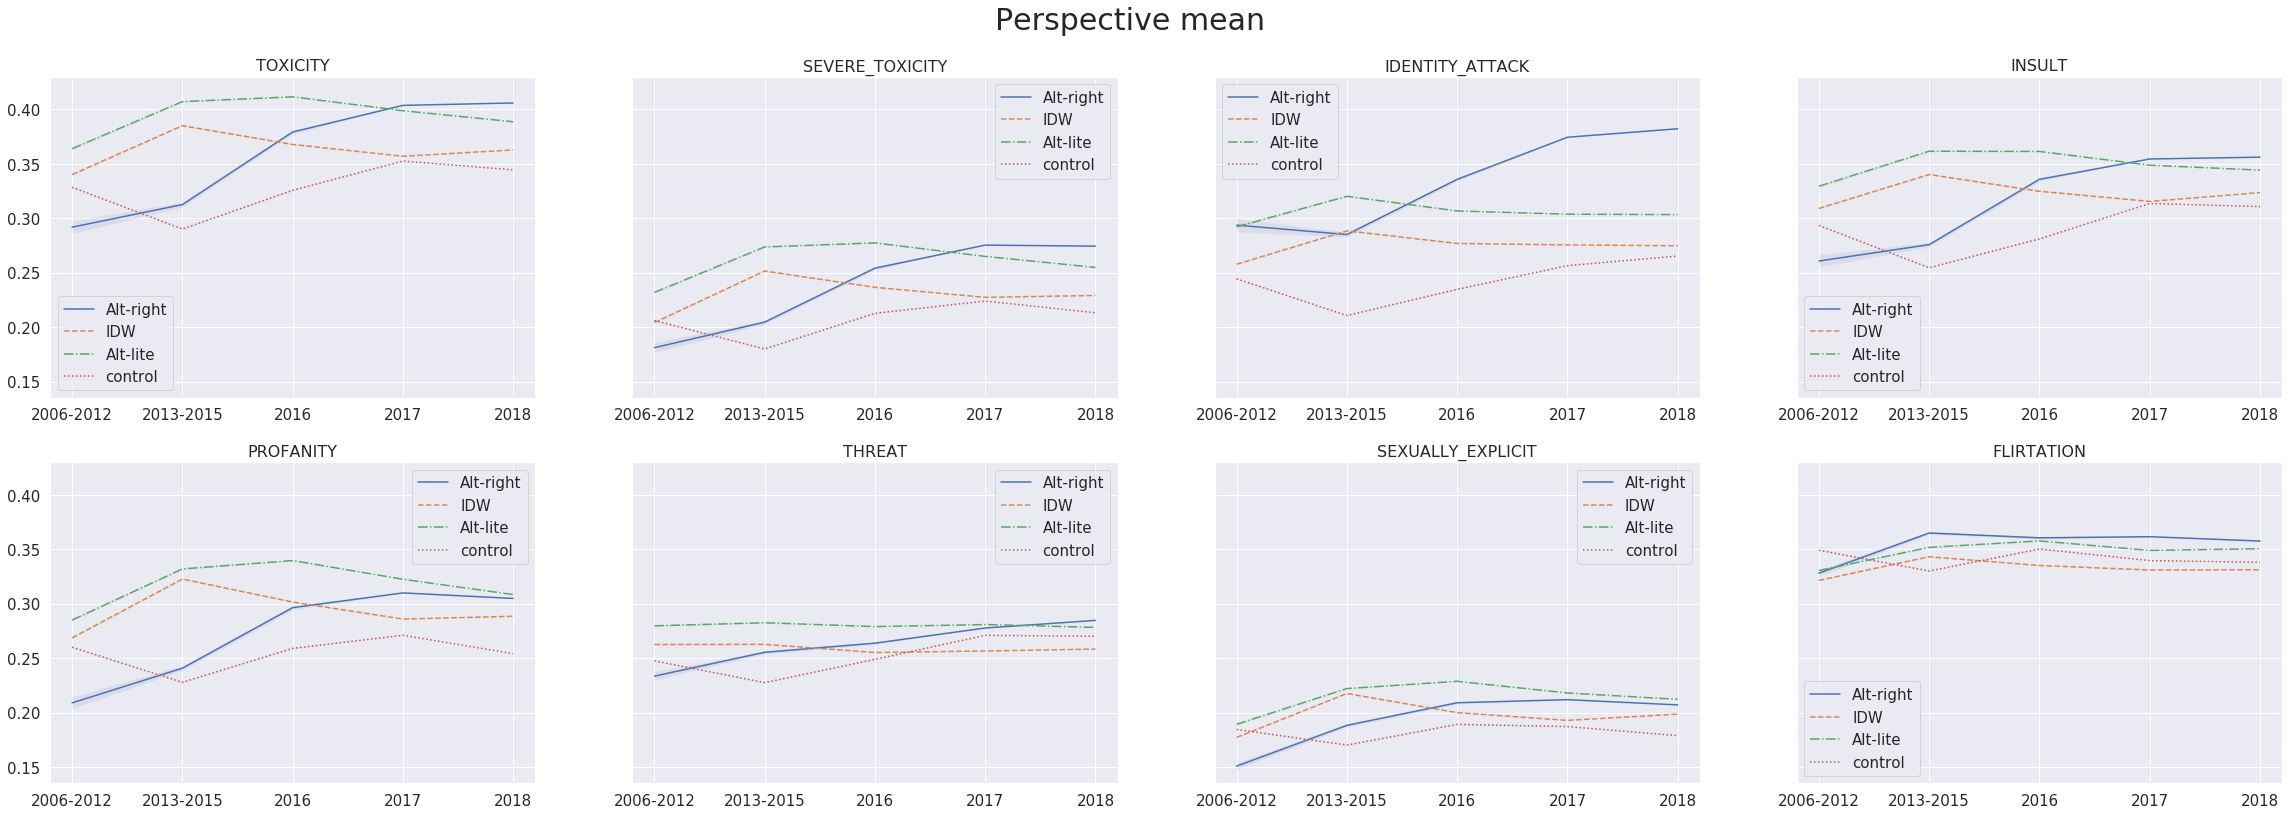

In [57]:
fig, ax = plt.subplots(2, 4, figsize=[40, 13],  squeeze=False, sharey=True)
c=0
plt.suptitle("Perspective mean", fontsize=30, y=0.955)
for emotion in attributes:
    ax[c//4, c%4].set_ylim([0.135,0.43])
    ax[c//4, c%4].set_title(emotion, fontsize=16)
    for i in range(len(names)):
        ax[c//4, c%4].plot(perspective[i]["year"], perspective[i][emotion], lines[i])
        ax[c//4, c%4].fill_between(perspective[i]["year"], perspective[i][f"{emotion}_dyd"],
                                   perspective[i][f"{emotion}_dyu"], alpha=0.1)
    ax[c//4, c%4].legend(names, prop={'size': 15})
    ax[c//4, c%4].tick_params(axis='both', labelsize=15)


    c+=1
plt.savefig(f"{img_path}perspective/time/perspective_sharey.png")    

### Perspective with Empath

In [34]:
def plot_persp_empath(attr):
    y = []
    names = ["Alt-right", "IDW", "Alt-lite", "control"]
    for name in names:
        y.append(pd.read_csv(f"./empath_perspective/{name}_{attr}_empath.csv"))
        
    fig, ax = plt.subplots(7, 3, figsize=[20, 50],  squeeze=False, sharey=True)
    c=0
    plt.suptitle(f"{attr} of Empath", fontsize=20, y=.9)

    for emotion in emotion_list[1:]:
        ax[c//3, c%3].set_title(f'{emotion} {attr} mean', fontsize=16)
        for i in range(len(names)):
            ax[c//3, c%3].plot(y[i]["year"][3:], y[i][emotion][3:], lines[i])
            ax[c//3, c%3].fill_between(y[i]["year"][3:], y[i][f"{emotion}_dyd"][3:],
                                       y[i][f"{emotion}_dyu"][3:], alpha=0.1)    
        ax[c//3, c%3].legend(names)
        c+=1
    #plt.savefig(f"{imgs_path}empath_perspective/{attr}_Empath.png", bbox_inches = 'tight')
    plt.show()
    plt.close()

In [60]:
lines = ['-', '--', '-.', ':',  '-.', ':','--', '-']
attributes_reduced = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK', 'INSULT', 'THREAT']
emp_persp_df_path = df_path + "empath_perspective_df/time/"

In [ ]:
names = ["Alt-right", "IDW", "Alt-lite", "control"]
for name in names:
    y = []
    for attr in attributes_reduced:
        y.append(pd.read_csv(f"{emp_persp_df_path}{name}_{attr}_empath.csv"))

    fig, ax = plt.subplots(7, 3, figsize=[20, 50],  squeeze=False, sharey=True)
    c=0
    plt.suptitle(f"{name} Empath + Perspective", fontsize=20, y=.9)
    for emotion in emotion_list[1:]:
        ax[c//3, c%3].set_ylim([0.18, 0.7])
        ax[c//3, c%3].set_title(f'{name} {emotion}', fontsize=16)
        for i in range(len(attributes_reduced)):
            ax[c//3, c%3].plot(y[i]["year"][3:], y[i][emotion][3:], lines[i])
            ax[c//3, c%3].fill_between(y[i]["year"][3:], y[i][f"{emotion}_dyd"][3:],
                                       y[i][f"{emotion}_dyu"][3:], alpha=0.1)    
        ax[c//3, c%3].legend(attributes_reduced)
        
        c+=1
    #plt.savefig(f"{imgs_path}empath_perspective/{name}_Empath_Perspective.png", bbox_inches = 'tight')
    plt.show()
    plt.close()

# Pearson Coeficient

### Pearson Perspective Matrix

In [76]:
matrixes = []
for name in names:
    df = pd.read_csv(f"{persp_df_path}{name}_perspective.csv")
    df = df[attributes]
    arr = df.values

    z = np.zeros([10, 8])
    matrix = np.corrcoef(arr.T)
    for i in range(8):
        for j in range(8):
            z[i+1][j] = matrix[i][j]
            
    matrixes.append(z)

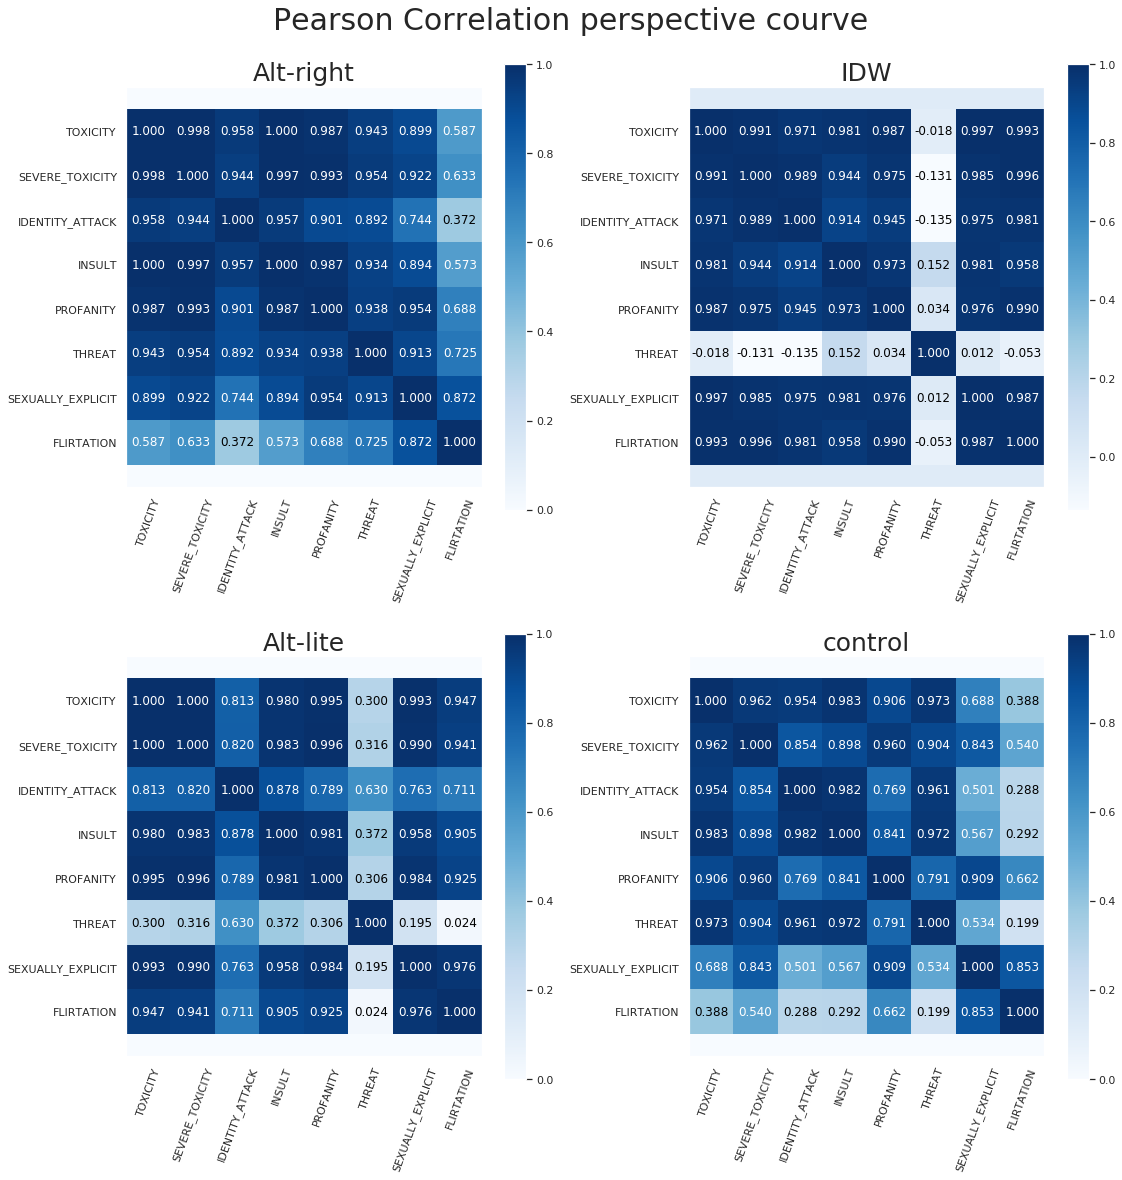

In [79]:
size=8
nr_rows = 2
nr_cols = 2  
prop = 1

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*size, nr_rows*size), squeeze=False)

plt.suptitle("Pearson Correlation perspective courve", y=1.03, fontsize=30*prop)

for r in range(0,nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c

        if col < len(matrixes):
            
            matrix = matrixes[col]
            cmap=plt.cm.Blues
            axs[r][c].grid(False)
            axs[r][c].tick_params(axis='x', rotation=70)
            axs[r][c].tick_params(axis='y')
            axs[r][c].set_title(names[col], fontsize=25)
            
            im = axs[r][c].imshow(matrix, interpolation='nearest', cmap=cmap)
            axs[r][c].figure.colorbar(im, ax=axs[r][c])

            # We want to show all ticks...
            axs[r][c].set(xticks=np.arange(matrix.shape[1]),
                   yticks=np.arange(matrix.shape[0]),
                   # ... and label them with the respective list entries,
                   xticklabels=attributes, yticklabels=[""] + attributes)
            # Loop over data dimensions and create text annotations.
            fmt = '.3f'
            thresh = matrix.max() / 2.
            for i in range(matrix.shape[0]):
                for j in range(matrix.shape[1]):
                    if i==0 or i==len(attributes)+1: continue
                    axs[r][c].text(j, i, format(matrix[i, j], fmt),
                            ha="center", va="center",
                            color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig(f'{img_path}pearson_correlation/time/pearson_correlation_perspective_matrix_square.png', bbox_inches = 'tight')
plt.show()

### Pearson Empath Matrix

In [40]:
def plot_pearson_matrix(matrix, title, size, xticklabels, yticklabels):
    nr_rows = 1
    nr_cols = 1  
    prop = size/18

    fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*size,nr_rows*size-2), squeeze=False)

    plt.suptitle(title, y=1.01, fontsize=25*prop)
    plt.xticks(rotation=70, fontsize=15*prop)
    plt.yticks(rotation=0, fontsize=15*prop)

    for r in range(0,nr_rows):
        for c in range(0, nr_cols): 
            col = r*nr_cols+c

            if col < len(matrix):

                matrix = matrix
                cmap=plt.cm.Blues

                axs[r][c].grid(False)
                im = axs[r][c].imshow(matrix, interpolation='nearest', cmap=cmap)
                axs[r][c].figure.colorbar(im, ax=axs[r][c])

                # We want to show all ticks...
                axs[r][c].set(xticks=np.arange(matrix.shape[1]),
                       yticks=np.arange(matrix.shape[0]),
                       # ... and label them with the respective list entries
                       xticklabels=xticklabels, yticklabels=[""] + yticklabels)
                # Loop over data dimensions and create text annotations.
                fmt = '.3f'
                thresh = matrix.max() / 2.
                for i in range(matrix.shape[0]):
                    for j in range(matrix.shape[1]):
                        if i==0 or i==len(xticklabels)+1: continue
                        axs[r][c].text(j, i, format(matrix[i, j], fmt),
                                ha="center", va="center",
                                color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.savefig(f'{imgs_path}pearson_correlation/{title}.png', bbox_inches = 'tight')
    plt.show()
    plt.close()

In [44]:
def df_to_plot_empath(name, ticks=emotion_list):
    df = pd.read_csv(f"{empath_df_path}{name}.csv")
    arr = df.values

    arr = np.delete(arr, 0, 1)
    arr = np.delete(arr, 1, 1)
    arr = np.delete(arr, 21, 1)
    arr = np.delete(arr, 0, 0)
    arr = np.delete(arr, 1, 0)
    arr = np.delete(arr, 2, 0)

    z = np.zeros([23, 21])
    matrix = np.corrcoef(arr.T)
    for i in range(21):
        for j in range(21):
            z[i+1][j] = matrix[i][j]

    plot_pearson_matrix(z, title=f"Pearson correlation from {name} empath courve", size=20,
                        xticklabels=ticks, yticklabels=ticks)

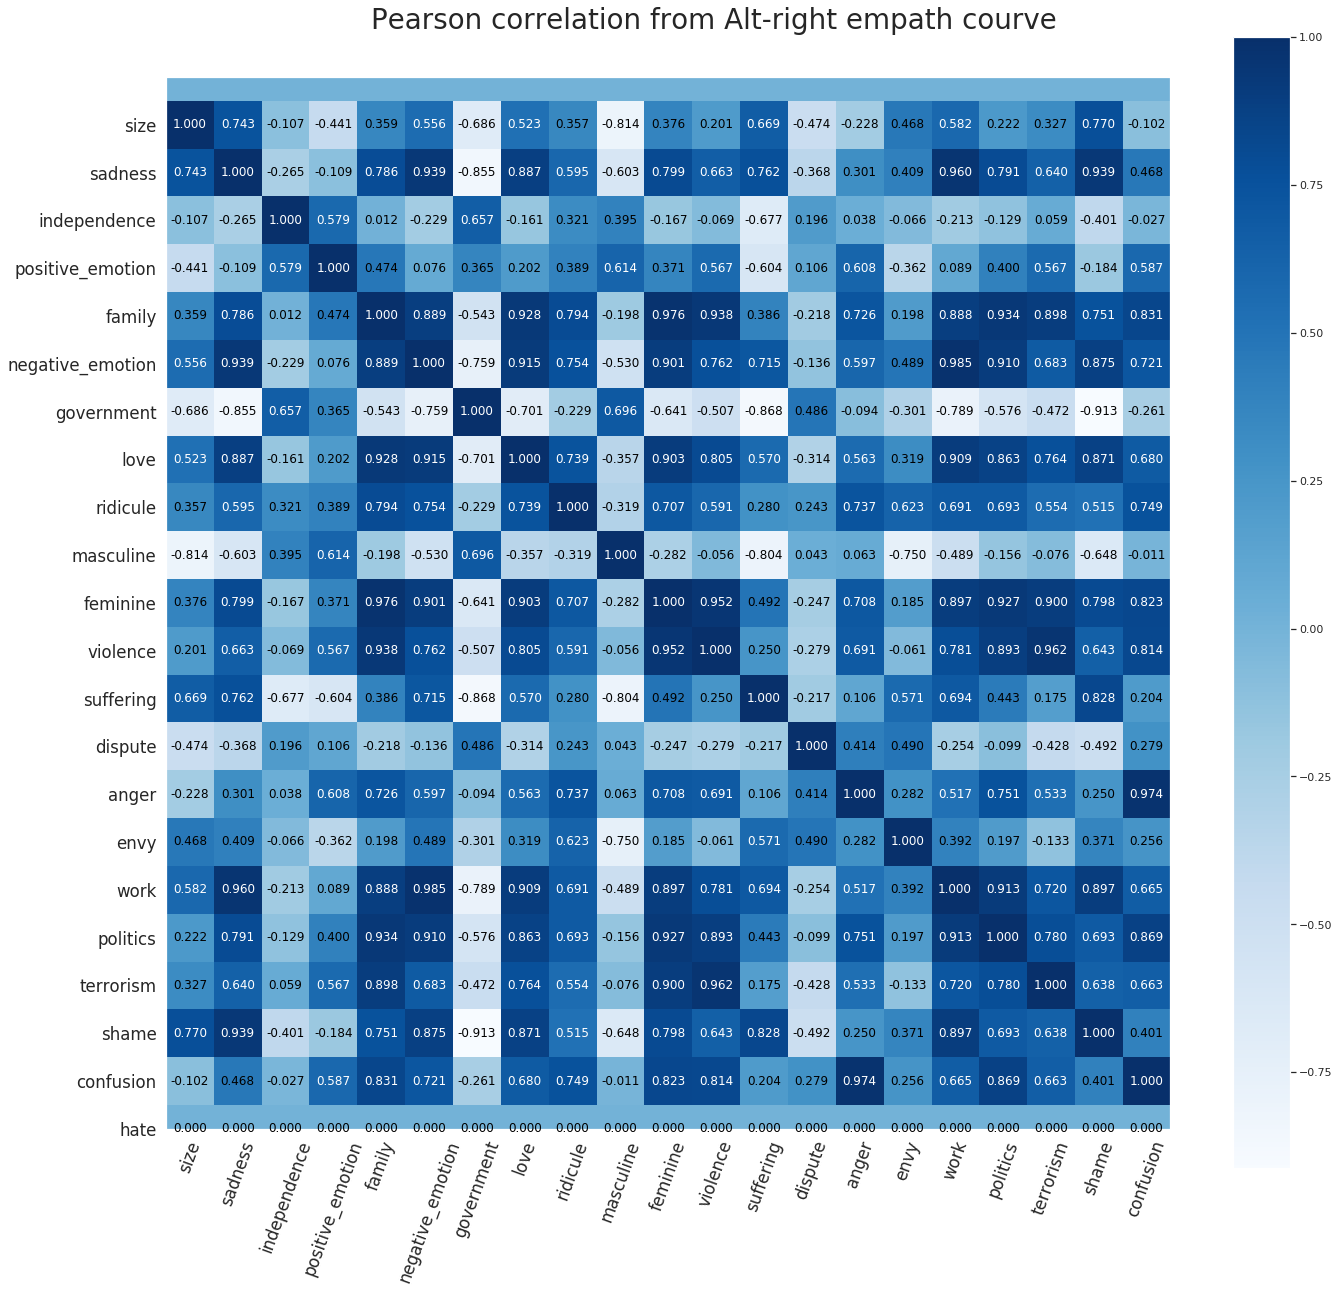

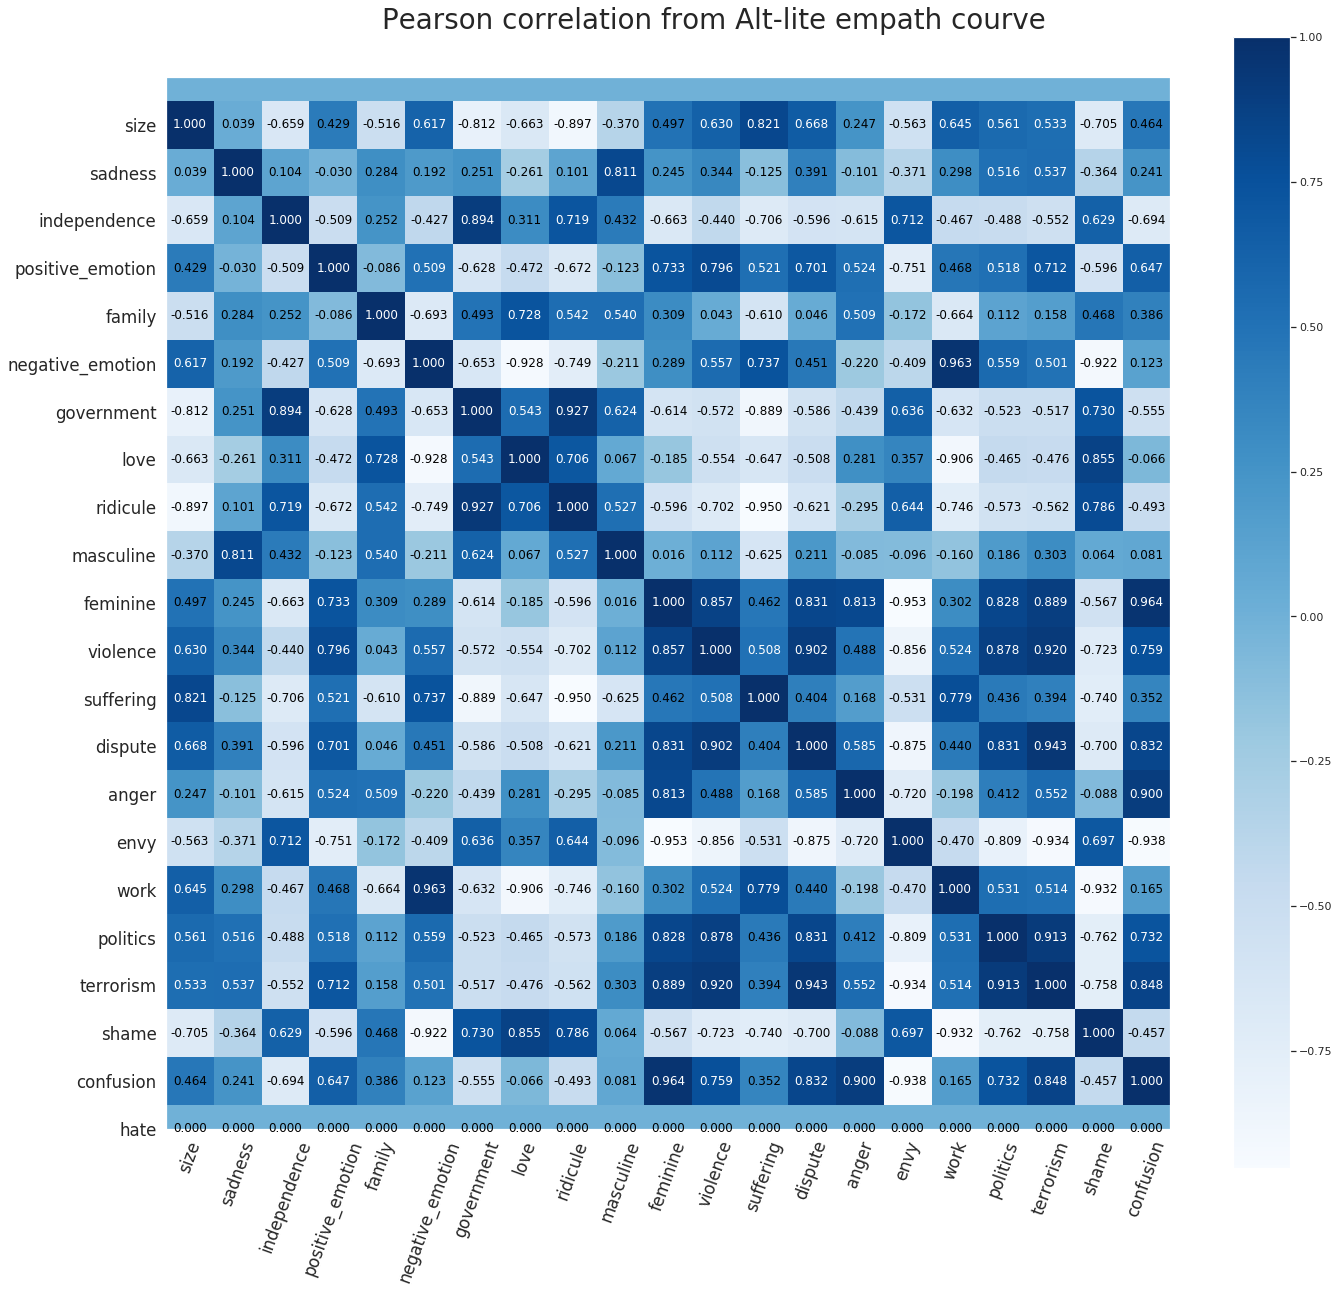

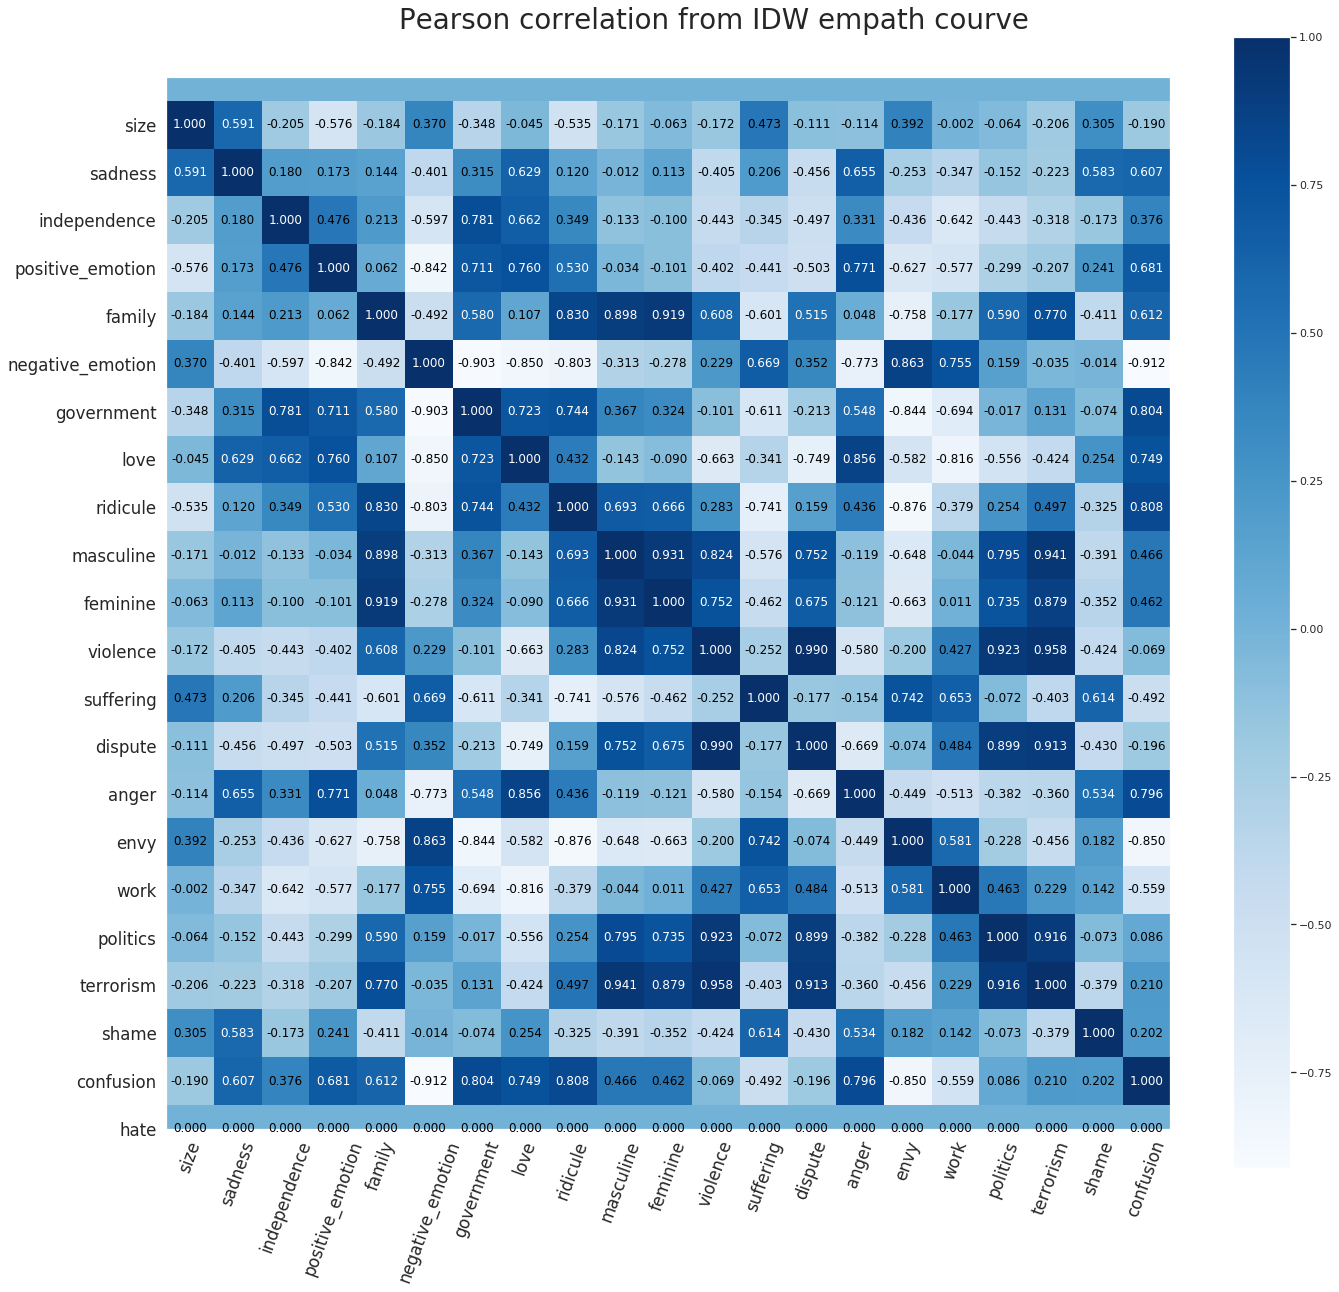

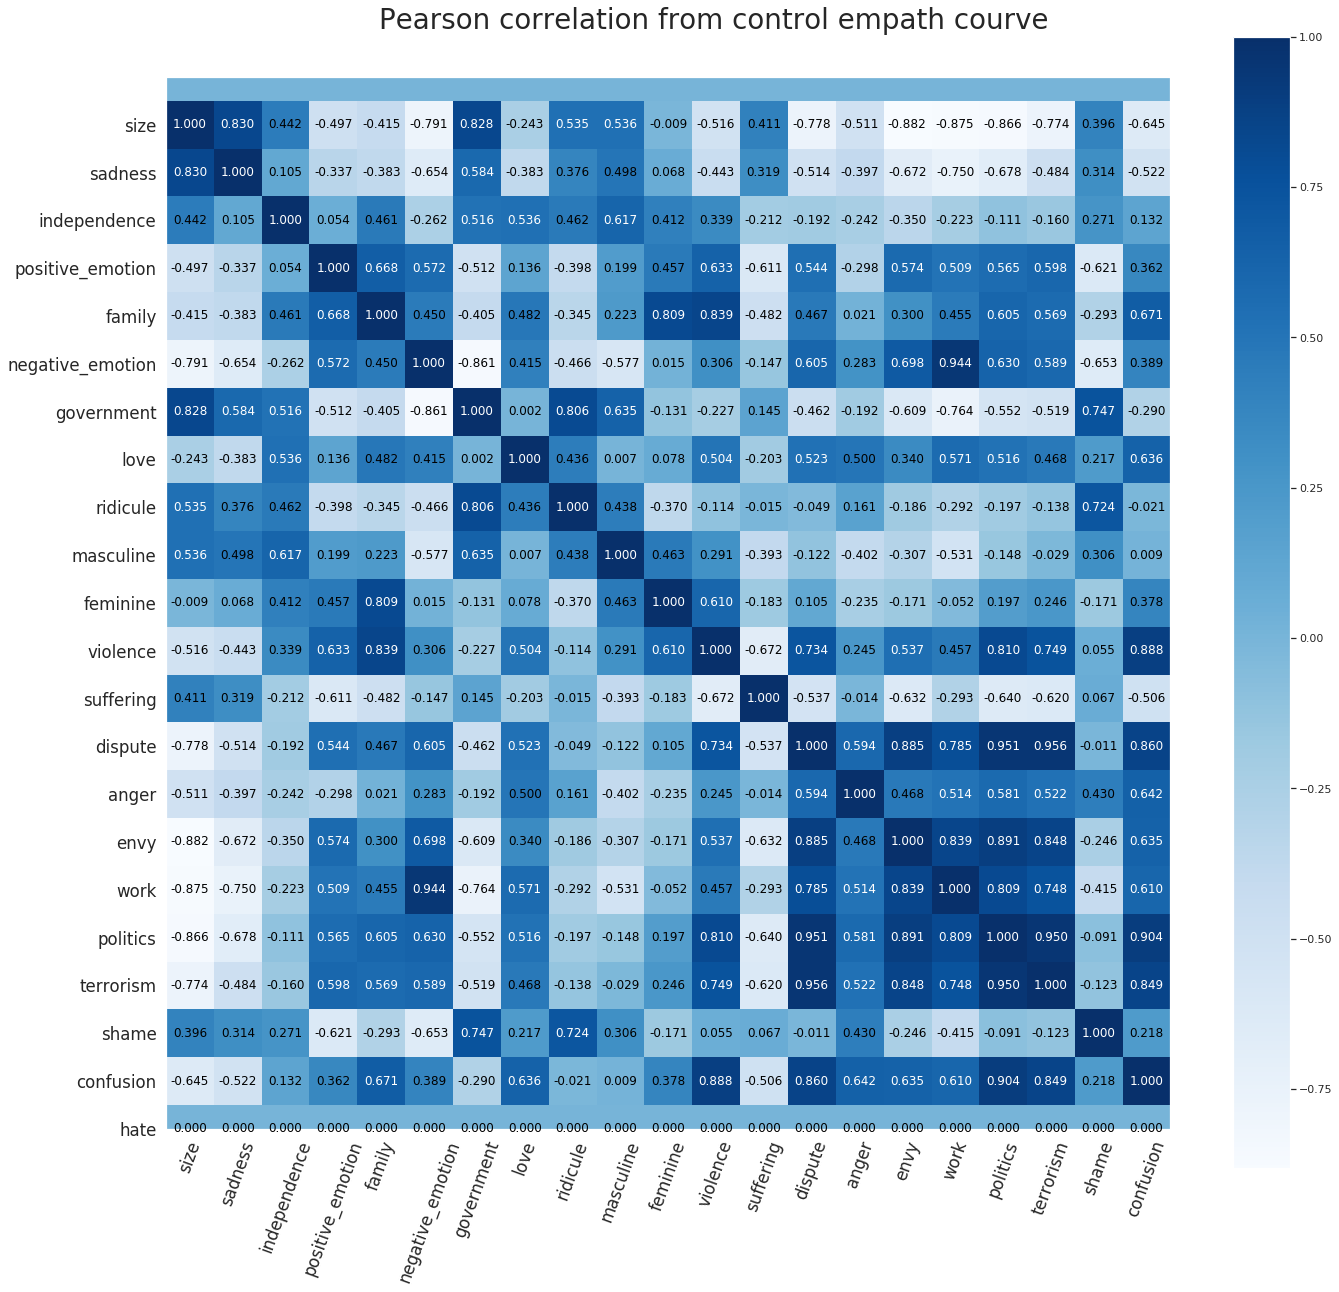

In [45]:
df_to_plot_empath("Alt-right")
df_to_plot_empath("Alt-lite")
df_to_plot_empath("IDW")
df_to_plot_empath("control")

### Pearson Perspective Graph

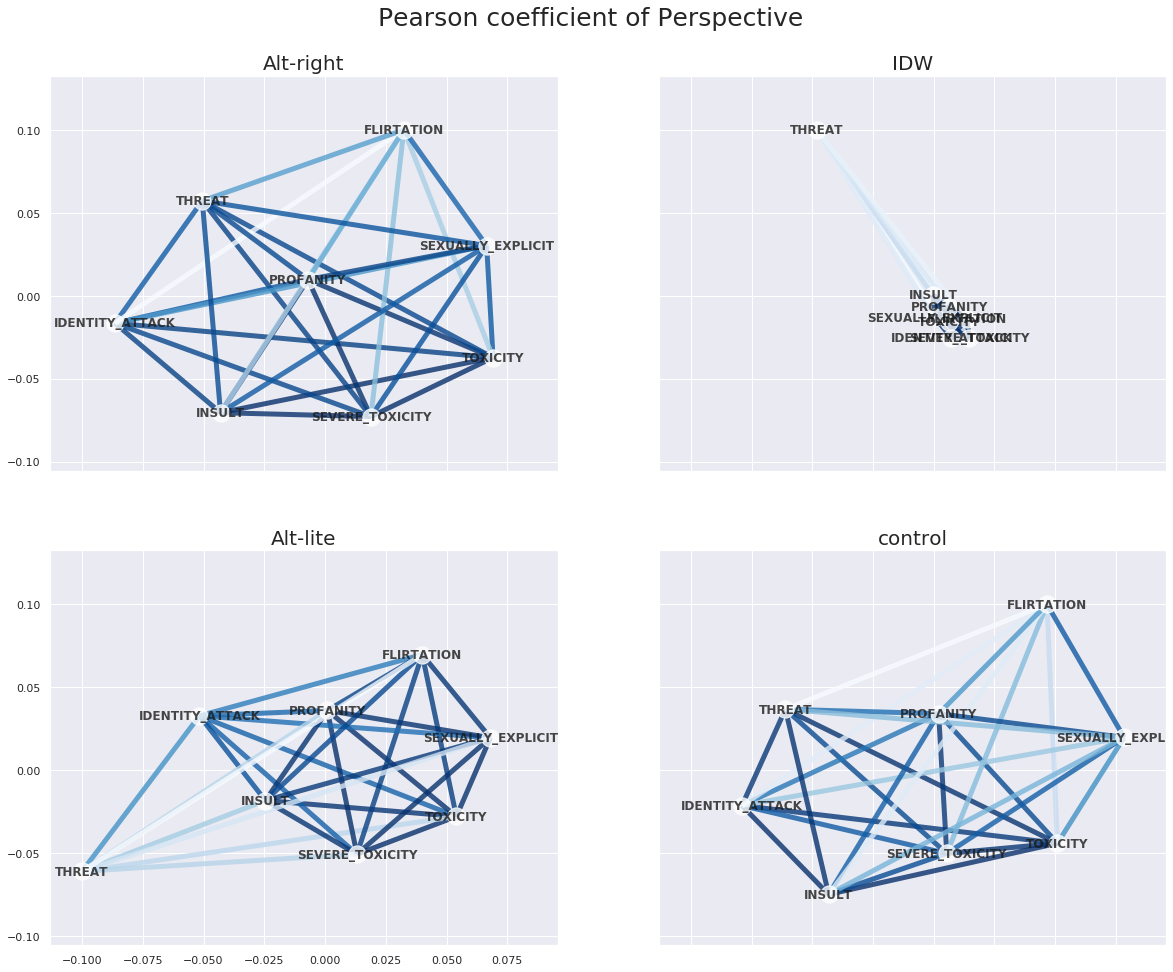

In [82]:
Graphs = []
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*8), squeeze=False, sharex=True, sharey=True)
fig.suptitle('Pearson coefficient of Perspective', fontsize=25, y=0.94)

for r in range(0, nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c
        Gr = nx.Graph()
        
        df = pd.read_csv(f"{persp_df_path}{names[col]}_perspective.csv")
        df = df[attributes]
        arr = df.values
        corref= np.corrcoef(arr.T)
        
        for rr in range(8):
            for cc in range(8):
                if rr==cc: continue
                Gr.add_weighted_edges_from([[attributes[rr], attributes[cc], corref[rr][cc]]])

        no_degree = []
        size = []
        
        for node in Gr.nodes:
            if Gr.degree(node, weight='weight') == 0:
                no_degree.append(node)
            else:
                size.append(Gr.degree(node, weight='weight'))
    
        Gr.remove_nodes_from(no_degree)
        
        axs[r, c].set_title(names[col], fontsize=20)
        
        size = [Gr.edges[i]['weight'] for i in Gr.edges]
        nx.draw_networkx(Gr, pos=nx.spring_layout(Gr, seed=6, scale=0.1), with_labels=True, alpha=0.8,
                         edge_color=np.array(size), width=5, ax=axs[r, c],
                         edge_cmap=plt.cm.Blues, node_color='w',font_weight="bold")
plt.savefig(f"{img_path}pearson_correlation/time/pearson_correlation_perspective_graph.png",bbox_inches = 'tight')

### Pearson Empath Graph

In [ ]:
Graphs = []
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*8), squeeze=False, sharex=True, sharey=True)
fig.suptitle('Pearson coefficient of Empath', fontsize=25, y=0.94)

for r in range(0, nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c
        Gr = nx.Graph()
        
        df = pd.read_csv(f"{empath_df_path}{names[col]}.csv")
        arr = df.values
        arr = np.delete(arr, 0, 1)
        arr = np.delete(arr, 1, 1)
        arr = np.delete(arr, 21, 1)
        arr = np.delete(arr, 0, 0)
        arr = np.delete(arr, 1, 0)
        arr = np.delete(arr, 2, 0)
        corref= np.corrcoef(arr.T)
        
        for rr in range(21):
            for cc in range(21):
                if rr==cc: continue
                Gr.add_weighted_edges_from([[emotion_list[rr], emotion_list[cc], corref[rr][cc]]])

        no_degree = []
        size = []
        
        for node in Gr.nodes:
            if Gr.degree(node, weight='weight') == 0:
                no_degree.append(node)
            else:
                size.append(Gr.degree(node, weight='weight'))
    
        Gr.remove_nodes_from(no_degree)
        
        axs[r, c].set_title(names[col], fontsize=20)
        
        size = [Gr.edges[i]['weight'] for i in Gr.edges]
        nx.draw_networkx(Gr, pos=nx.spring_layout(Gr, seed=6, scale=0.1), with_labels=True, alpha=0.8,
                         edge_color=np.array(size), width=5, ax=axs[r, c],
                         edge_cmap=plt.cm.Blues, node_color='w',font_weight="bold")
#plt.savefig("{imgs_path}pearson_correlation/pearson_correlation_empath_graph.png", bbox_inches = 'tight')